In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
df = pd.read_csv('/kaggle/input/world-happiness/2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**Coorelation Analysis**


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

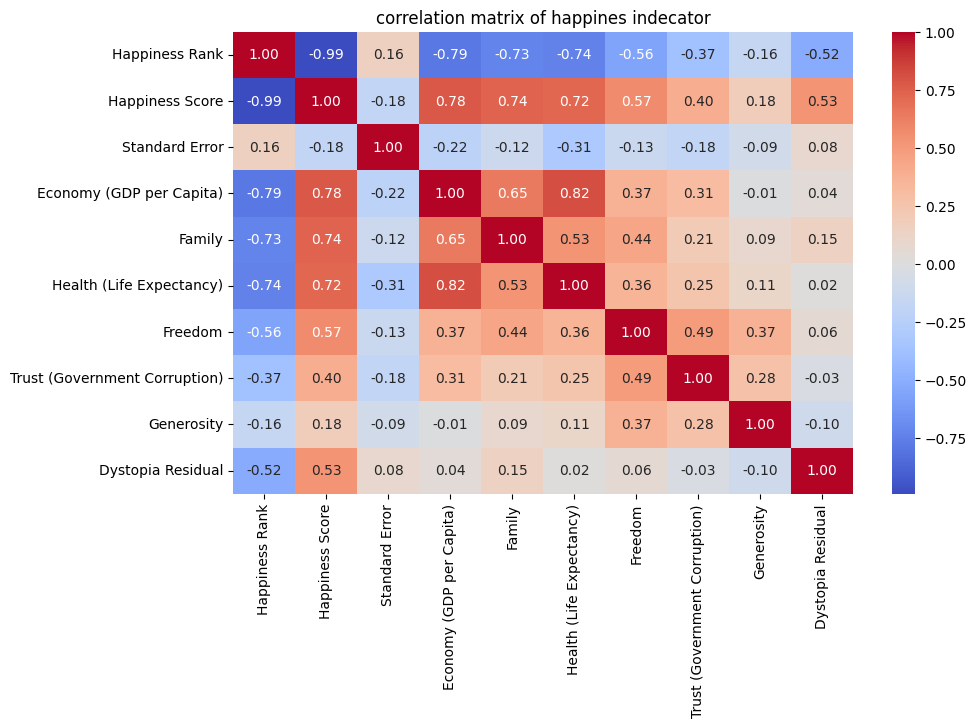

In [5]:
plt.figure(figsize = (10,6))
corr = df.corr(numeric_only = True)

sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('correlation matrix of happines indecator')
plt.show()


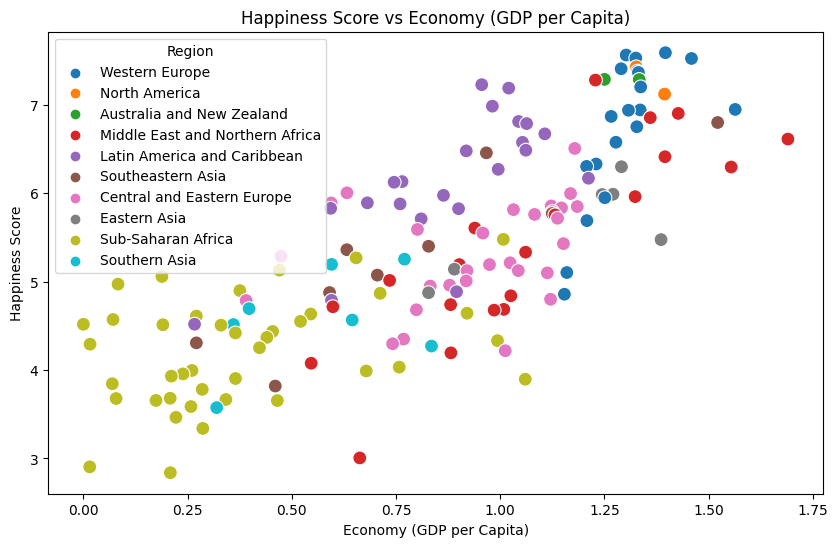

In [6]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df,x = 'Economy (GDP per Capita)',y = 'Happiness Score',hue = 'Region',palette = 'tab10',s = 100)

plt.title('Happiness Score vs Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')

plt.show()

**Top 5 Happiest & Unhappiest Countries**

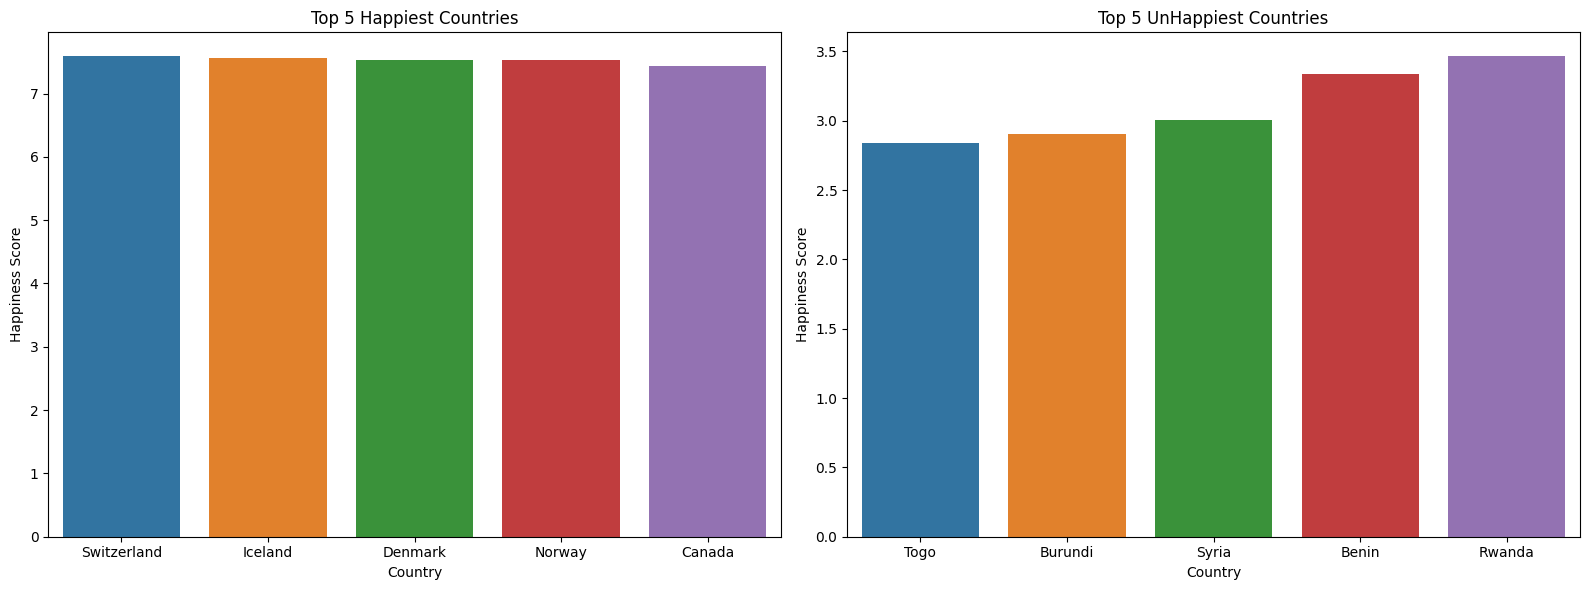

In [7]:
top5 = df.nlargest(5,'Happiness Score')
bottom5 = df.nsmallest(5,'Happiness Score')

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.barplot(ax = axes[0],data = top5,x = 'Country', y = 'Happiness Score')
axes[0].set_title('Top 5 Happiest Countries')

sns.barplot(ax = axes[1],data = bottom5,x = 'Country', y = 'Happiness Score')
axes[1].set_title('Top 5 UnHappiest Countries')


plt.tight_layout()

plt.show()

**Bubble Map (Happiness by Region)**

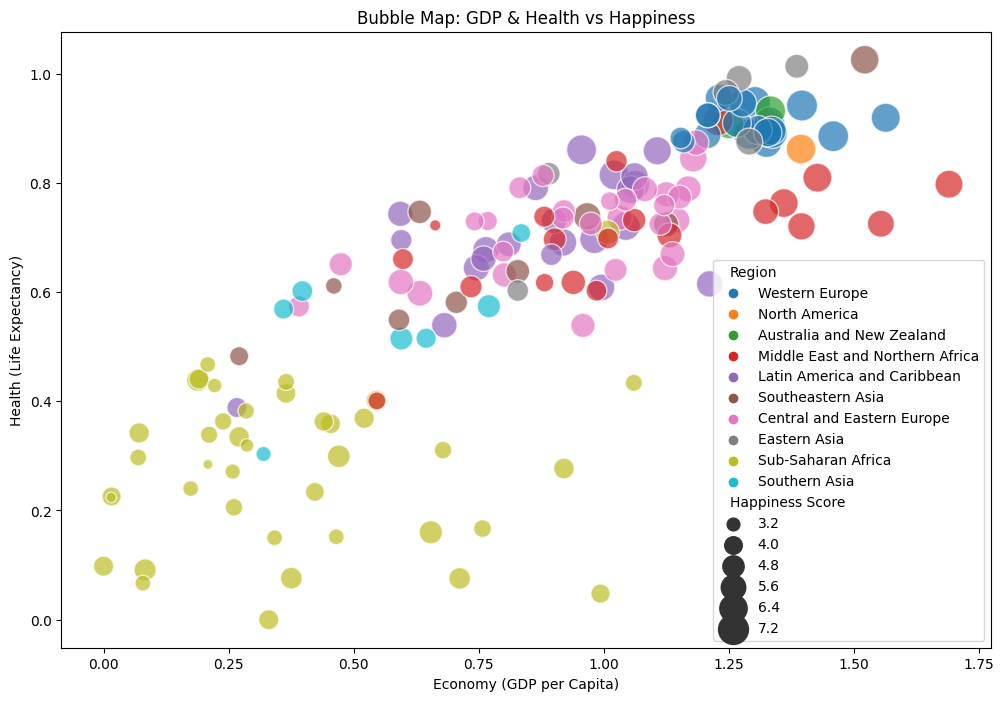

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, 
                x='Economy (GDP per Capita)', 
                y='Health (Life Expectancy)', 
                size='Happiness Score', 
                hue='Region', 
                alpha=0.7, sizes=(50, 500))
plt.title('Bubble Map: GDP & Health vs Happiness')
plt.show()


**Global Comparison by Region**

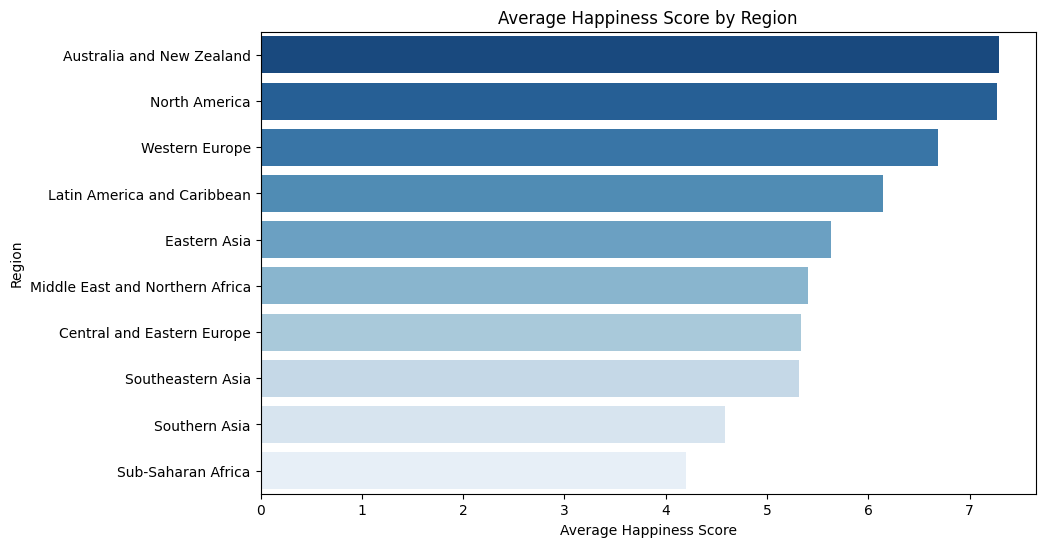

In [9]:
region_avg = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='Blues_r')
plt.title('Average Happiness Score by Region')
plt.xlabel('Average Happiness Score')
plt.show()